In [1]:
### importing packeges 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import datetime as dt

%matplotlib inline

### fixing file path

In [2]:
file_path = 'C:/Data_set/'

# BUSINESS PROBLEM_1

### impporting_Data

In [3]:
loans = pd.read_csv(file_path+'LoansData.csv')

### Data inspection

In [4]:
loans

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.00,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.00,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.00,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.00,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.00,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,30000.0,29950.00,16.77%,60 months,debt_consolidation,19.23%,NY,MORTGAGE,9250.00,705-709,15.0,45880.0,1.0,8 years
2496,16000.0,16000.00,14.09%,60 months,home_improvement,21.54%,MD,OWN,8903.25,740-744,18.0,18898.0,1.0,10+ years
2497,10000.0,10000.00,13.99%,36 months,debt_consolidation,4.89%,PA,MORTGAGE,2166.67,680-684,4.0,4544.0,0.0,10+ years
2498,6000.0,6000.00,12.42%,36 months,major_purchase,16.66%,NJ,RENT,3500.00,675-679,8.0,7753.0,0.0,5 years


In [5]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2499 non-null   float64
 1   Amount.Funded.By.Investors      2499 non-null   float64
 2   Interest.Rate                   2498 non-null   object 
 3   Loan.Length                     2500 non-null   object 
 4   Loan.Purpose                    2500 non-null   object 
 5   Debt.To.Income.Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home.Ownership                  2499 non-null   object 
 8   Monthly.Income                  2499 non-null   float64
 9   FICO.Range                      2498 non-null   object 
 10  Open.CREDIT.Lines               2497 non-null   float64
 11  Revolving.CREDIT.Balance        2497 non-null   float64
 12  Inquiries.in.the.Last.6.Months  24

### Interest.Rate, Loan.Length , Debt.To.Income.Ratio, FICO.Range , Employment.Length # These variables were found in unsuitable data types. converting into suitable datatypes

In [6]:
loans['Interest.Rate']=loans['Interest.Rate'].str.replace('%', '').astype('float')

In [7]:
loans['Loan.Length']=loans['Loan.Length'].str.replace(' months', '').astype('int')

In [8]:
loans['Debt.To.Income.Ratio']=loans['Debt.To.Income.Ratio'].str.replace('%', '').astype('float')

In [9]:
loans['FICO.Range_2']=loans['FICO.Range'].str[0:3]

In [10]:
loans['FICO.Range_2']=loans['FICO.Range_2'].astype('float')

In [11]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2499 non-null   float64
 1   Amount.Funded.By.Investors      2499 non-null   float64
 2   Interest.Rate                   2498 non-null   float64
 3   Loan.Length                     2500 non-null   int32  
 4   Loan.Purpose                    2500 non-null   object 
 5   Debt.To.Income.Ratio            2499 non-null   float64
 6   State                           2500 non-null   object 
 7   Home.Ownership                  2499 non-null   object 
 8   Monthly.Income                  2499 non-null   float64
 9   FICO.Range                      2498 non-null   object 
 10  Open.CREDIT.Lines               2497 non-null   float64
 11  Revolving.CREDIT.Balance        2497 non-null   float64
 12  Inquiries.in.the.Last.6.Months  24

### imputation of missing value as missing values are less than 5%

In [12]:
loans.isnull().sum()

Amount.Requested                   1
Amount.Funded.By.Investors         1
Interest.Rate                      2
Loan.Length                        0
Loan.Purpose                       0
Debt.To.Income.Ratio               1
State                              0
Home.Ownership                     1
Monthly.Income                     1
FICO.Range                         2
Open.CREDIT.Lines                  3
Revolving.CREDIT.Balance           3
Inquiries.in.the.Last.6.Months     3
Employment.Length                 77
FICO.Range_2                       2
dtype: int64

In [13]:
loans[loans['Amount.Requested'].isnull()]

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,FICO.Range_2
2487,NaN,15000.0,NaN,36,wedding,18.05,CA,RENT,8000.0,660-664,6.0,45976.0,1.0,2 years,660.0


In [14]:
loans['Amount.Requested'].fillna(15000, inplace=True)

In [15]:
loans[loans['Amount.Funded.By.Investors'].isnull()]

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,FICO.Range_2
2490,10000.0,NaN,11.71,36,debt_consolidation,8.4,CA,RENT,4500.0,710-714,8.0,8404.0,1.0,3 years,710.0


In [16]:
loans['Amount.Funded.By.Investors'].fillna(10000, inplace=True)

In [17]:
loans[loans['Interest.Rate'].isnull()]

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,FICO.Range_2
2484,15000.0,15000.0,NaN,36,credit_card,28.28,OH,MORTGAGE,6666.67,690-694,15.0,14880.0,0.0,10+ years,690.0
2487,15000.0,15000.0,NaN,36,wedding,18.05,CA,RENT,8000.00,660-664,6.0,45976.0,1.0,2 years,660.0


In [18]:
loans['Interest.Rate'].fillna(round(loans['Interest.Rate'].mean(),1), inplace=True)

In [19]:
loans[loans['Debt.To.Income.Ratio'].isnull()]

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,FICO.Range_2
2492,6400.0,6350.0,10.08,36,debt_consolidation,NaN,NJ,NaN,5166.67,710-714,5.0,5815.0,2.0,10+ years,710.0


In [20]:
loans['Debt.To.Income.Ratio'].fillna(round(loans['Debt.To.Income.Ratio'].mean(),1), inplace=True)

In [21]:
loans[loans['Home.Ownership'].isnull()]

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,FICO.Range_2
2492,6400.0,6350.0,10.08,36,debt_consolidation,15.4,NJ,NaN,5166.67,710-714,5.0,5815.0,2.0,10+ years,710.0


In [22]:
loans['Home.Ownership'].fillna('MORTGAGE', inplace=True)

In [23]:
loans[loans['Monthly.Income'].isnull()]

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,FICO.Range_2
366,5000.0,4525.0,7.43,36,other,1.0,NY,NONE,NaN,800-804,NaN,NaN,NaN,< 1 year,800.0


In [24]:
loans['Monthly.Income'].fillna(5000, inplace=True)

In [25]:
loans[loans['FICO.Range'].isnull()]

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,FICO.Range_2
2488,17000.0,17000.0,15.81,36,debt_consolidation,17.01,CO,RENT,3833.33,NaN,6.0,15484.0,1.0,6 years,NaN
2494,24000.0,23975.0,14.65,36,debt_consolidation,15.29,WA,MORTGAGE,6666.67,NaN,13.0,17521.0,0.0,5 years,NaN


In [26]:
loans['FICO.Range'].fillna('695-699', inplace=True)

In [27]:
loans['FICO.Range_2'].fillna(695, inplace=True)

In [28]:
loans.isnull().sum()

Amount.Requested                   0
Amount.Funded.By.Investors         0
Interest.Rate                      0
Loan.Length                        0
Loan.Purpose                       0
Debt.To.Income.Ratio               0
State                              0
Home.Ownership                     0
Monthly.Income                     0
FICO.Range                         0
Open.CREDIT.Lines                  3
Revolving.CREDIT.Balance           3
Inquiries.in.the.Last.6.Months     3
Employment.Length                 77
FICO.Range_2                       0
dtype: int64

In [29]:
loans.head(5)

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,FICO.Range_2
0,20000.0,20000.0,8.90,36,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year,735.0
1,19200.0,19200.0,12.12,36,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years,715.0
2,35000.0,35000.0,21.98,60,debt_consolidation,23.81,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years,690.0
3,10000.0,9975.0,9.99,36,debt_consolidation,14.30,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years,695.0
4,12000.0,12000.0,11.71,36,credit_card,18.78,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years,695.0


In [30]:
def continuous_var_summary( x ):
    
    # freq and missings
    n_total = x.shape[0]
    n_miss = x.isna().sum()
    perc_miss = n_miss * 100 / n_total
    
    # outliers - iqr
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lc_iqr = q1 - 1.5 * iqr
    uc_iqr = q3 + 1.5 * iqr
    
    
    return pd.Series( [ x.dtype, x.nunique(), n_total, x.count(), n_miss, perc_miss,
                       x.sum(), x.mean(), x.std(), x.var(), 
                       lc_iqr, uc_iqr, 
                       x.min(), x.quantile(0.01), x.quantile(0.05), x.quantile(0.10), 
                       x.quantile(0.25), x.quantile(0.5), x.quantile(0.75), 
                       x.quantile(0.90), x.quantile(0.95), x.quantile(0.99), x.max() ], 
                     
                    index = ['dtype', 'cardinality', 'n_tot', 'n', 'nmiss', 'perc_miss',
                             'sum', 'mean', 'std', 'var',
                        'lc_iqr', 'uc_iqr',
                        'min', 'p1', 'p5', 'p10', 'p25', 'p50', 'p75', 'p90', 'p95', 'p99', 'max']) 

In [31]:
loans.select_dtypes(['float', 'int']).apply(continuous_var_summary)

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Debt.To.Income.Ratio,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,FICO.Range_2
dtype,float64,float64,float64,int32,float64,float64,float64,float64,float64,float64
cardinality,380,710,276,2,1670,632,29,2349,10,38
n_tot,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500
n,2500,2500,2500,2500,2500,2500,2497,2497,2497,2500
nmiss,0,0,0,0,0,0,3,3,3,0
perc_miss,0.0,0.0,0.0,0.0,0.0,0.0,0.12,0.12,0.12,0.0
sum,31016250.0,30003933.09,32663.54,103152,38451.07,14221639.37,25152.0,38012292.0,2264.0,1764740.0
mean,12406.5,12001.573236,13.065416,41.2608,15.380428,5688.655748,10.072887,15223.184622,0.906688,705.896
std,7801.544872,7745.320754,4.17553,9.930893,7.503551,3962.349122,4.507416,18281.015258,1.231149,35.029531
var,60864102.390956,59989993.578013,17.435047,98.622632,56.303271,15700210.564354,20.316801,334195518.850116,1.515728,1227.068011


# A, Intrest rate is varied for different loan amounts  (Less intrest charged for high loan amounts)

# Correlation coefficient-pearson's (r)

In [32]:
stats.pearsonr(loans['Amount.Funded.By.Investors'],loans['Interest.Rate'])

(0.3374582327360985, 1.2385347978597731e-67)

####### output: we reject null hypothesis

####### relation: This is a positive intermediate correlation b/w the variables, it indicates that values of these two variables are changing with same direction. (as loan amount increasing Interest rates are increasing)

####### Business conclusion: with the given data, it is unable to prove that less intrest charged for high loan amounts

# B. Loan length is directly effecting intrest rate

# Correlation coefficient-pearson's (r)

In [33]:
stats.pearsonr(loans['Loan.Length'],loans['Interest.Rate'] )

(0.42416839821575725, 9.593279558342899e-110)

####### output: we reject null hypothesis

####### relation: This is a positive intermediate correlation b/w the variables, it indicates that values of these two variables are changing with same direction. (as loan length increasing Interest rates are increasing)

####### Business conclusion: with the given data, it is proved that Loan length is directly effecting intrest rate

# c. Inrest rate varies for different purpose of loans

# ftest or ANOVA

In [34]:
loans['Loan.Purpose'].value_counts()

debt_consolidation    1307
credit_card            444
other                  201
home_improvement       152
major_purchase         101
small_business          87
car                     50
wedding                 39
medical                 30
moving                  29
vacation                21
house                   20
educational             15
renewable_energy         4
Name: Loan.Purpose, dtype: int64

In [35]:
loans['Loan.Purpose'].nunique()

14

In [36]:
loans.rename(columns={'Loan.Purpose':'LoanPurpose', 'Interest.Rate':'InterestRate'}, inplace=True )

In [37]:
g1 = loans.loc[loans.LoanPurpose=='debt_consolidation', 'InterestRate']
g2 = loans.loc[loans.LoanPurpose=='credit_card', 'InterestRate']
g3 = loans.loc[loans.LoanPurpose=='other', 'InterestRate']
g4 = loans.loc[loans.LoanPurpose=='home_improvement', 'InterestRate']
g5 = loans.loc[loans.LoanPurpose=='major_purchase', 'InterestRate']
g6 = loans.loc[loans.LoanPurpose=='small_business', 'InterestRate']
g7 = loans.loc[loans.LoanPurpose=='car', 'InterestRate']
g8 = loans.loc[loans.LoanPurpose=='wedding', 'InterestRate']
g9 = loans.loc[loans.LoanPurpose=='medical', 'InterestRate']
g10 = loans.loc[loans.LoanPurpose=='moving', 'InterestRate']
g11 = loans.loc[loans.LoanPurpose=='vacation', 'InterestRate']
g12 = loans.loc[loans.LoanPurpose=='house', 'InterestRate']
g13 = loans.loc[loans.LoanPurpose=='educational', 'InterestRate']
g14 = loans.loc[loans.LoanPurpose=='renewable_energy', 'InterestRate']

In [38]:
print('mean of g1', g1.mean())
print('mean of g2', g2.mean())
print('mean of g3', g3.mean())
print('mean of g4', g4.mean())
print('mean of g5', g5.mean())
print('mean of g6', g6.mean())
print('mean of g7', g7.mean())
print('mean of g8', g8.mean())
print('mean of g9', g9.mean())
print('mean of g10', g10.mean())
print('mean of g11', g11.mean())
print('mean of g12', g12.mean())
print('mean of g13', g13.mean())
print('mean of g14', g14.mean())

mean of g1 13.586916602907444
mean of g2 13.05076576576574
mean of g3 13.159552238805967
mean of g4 11.594276315789479
mean of g5 10.797821782178215
mean of g6 12.839195402298845
mean of g7 11.113000000000001
mean of g8 12.074102564102567
mean of g9 11.649666666666668
mean of g10 13.621034482758622
mean of g11 11.966190476190476
mean of g12 13.448000000000002
mean of g13 11.007333333333332
mean of g14 9.8775


In [39]:
stats.f_oneway(g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14)

F_onewayResult(statistic=7.4823081865964935, pvalue=1.1621022390953095e-14)

####### output: we reject null hypothesis

####### Business conclusions : Intrest rates are varies for different purpose of loans

# d. There is relationship between FICO scores and Home Ownership

# chi square test

In [40]:
loans['FICO.Range']

0       735-739
1       715-719
2       690-694
3       695-699
4       695-699
         ...   
2495    705-709
2496    740-744
2497    680-684
2498    675-679
2499    670-674
Name: FICO.Range, Length: 2500, dtype: object

In [41]:
loans['Home.Ownership']

0       MORTGAGE
1       MORTGAGE
2       MORTGAGE
3       MORTGAGE
4           RENT
          ...   
2495    MORTGAGE
2496         OWN
2497    MORTGAGE
2498        RENT
2499        RENT
Name: Home.Ownership, Length: 2500, dtype: object

In [42]:
pd.crosstab(loans['FICO.Range'],loans['Home.Ownership'] )

Home.Ownership,MORTGAGE,NONE,OTHER,OWN,RENT
FICO.Range,,,,,
640-644,0,0,0,1,4
645-649,1,0,0,0,2
650-654,1,0,0,0,0
655-659,0,0,1,0,3
660-664,41,0,0,17,67
665-669,52,0,0,18,75
670-674,67,0,1,13,90
675-679,79,0,1,11,75
680-684,55,0,2,9,91


In [43]:
stats.chi2_contingency(pd.crosstab(loans['FICO.Range'],loans['Home.Ownership'] ))

(473.67569772366426,
 9.68542787729629e-36,
 148,
 array([[2.29600e+00, 2.00000e-03, 1.00000e-02, 4.00000e-01, 2.29200e+00],
        [1.37760e+00, 1.20000e-03, 6.00000e-03, 2.40000e-01, 1.37520e+00],
        [4.59200e-01, 4.00000e-04, 2.00000e-03, 8.00000e-02, 4.58400e-01],
        [1.83680e+00, 1.60000e-03, 8.00000e-03, 3.20000e-01, 1.83360e+00],
        [5.74000e+01, 5.00000e-02, 2.50000e-01, 1.00000e+01, 5.73000e+01],
        [6.65840e+01, 5.80000e-02, 2.90000e-01, 1.16000e+01, 6.64680e+01],
        [7.85232e+01, 6.84000e-02, 3.42000e-01, 1.36800e+01, 7.83864e+01],
        [7.62272e+01, 6.64000e-02, 3.32000e-01, 1.32800e+01, 7.60944e+01],
        [7.20944e+01, 6.28000e-02, 3.14000e-01, 1.25600e+01, 7.19688e+01],
        [6.24512e+01, 5.44000e-02, 2.72000e-01, 1.08800e+01, 6.23424e+01],
        [6.42880e+01, 5.60000e-02, 2.80000e-01, 1.12000e+01, 6.41760e+01],
        [7.11760e+01, 6.20000e-02, 3.10000e-01, 1.24000e+01, 7.10520e+01],
        [6.01552e+01, 5.24000e-02, 2.62000e-01, 1.

####### output: we reject null hypothesis

####### Business conclusion: There is a relationship between FICO scores and Home Ownership

## People with owning home will have high FICO scores.

In [44]:
loans['FICO.Range']=loans['FICO.Range'].str.replace('-','.').astype('float')

In [45]:
loans.rename(columns={'Home.Ownership':'HomeOwnership', 'FICO.Range':'FICORange', 'FICO.Range_2':'FICORange_2'}, inplace=True)

In [46]:
loans.HomeOwnership.value_counts()

MORTGAGE    1148
RENT        1146
OWN          200
OTHER          5
NONE           1
Name: HomeOwnership, dtype: int64

In [47]:
g18 = loans.loc[loans.HomeOwnership=='OWN','FICORange_2']
g19 = loans.loc[loans.HomeOwnership=='MORTGAGE', 'FICORange_2']
g20 = loans.loc[loans.HomeOwnership=='RENT', 'FICORange_2']
g21 = loans.loc[loans.HomeOwnership=='OTHER', 'FICORange_2']
g22 = loans.loc[loans.HomeOwnership=='NONE', 'FICORange_2']

In [48]:
print('mean of g18 :' ,g18.mean())
print('mean of g19 :' ,g19.mean())
print('mean of g20 :' ,g20.mean())
print('mean of g21 :' ,g21.mean())
print('mean of g22 :' ,g22.mean())

mean of g18 : 706.55
mean of g19 : 711.6811846689895
mean of g20 : 700.0523560209424
mean of g21 : 672.0
mean of g22 : 800.0


In [49]:
stats.f_oneway(g18,g19,g20,g21,g22)

F_onewayResult(statistic=19.344856061810358, pvalue=1.0922383928478437e-15)

####### output: we reject null hypothesis

####### Business conclusions : FICO Ranges are varies for different Home Ownership

### Home Ownership of Own fico range and Home Ownership of MORTGAGE fico range

In [50]:
stats.f_oneway(g18,g19)

F_onewayResult(statistic=3.2190828958701903, pvalue=0.07300875028127543)

####### output: we fail to reject null hypothesis

####### Business conclusions : Home Ownership of Own fico range is lesser than Home Ownership of MORTGAGE fico range

### Home Ownership of Own fico range and Home Ownership of RENT fico range

In [51]:
stats.f_oneway(g18,g20)

F_onewayResult(statistic=6.831300264864858, pvalue=0.009057445924973151)

####### output: we reject null hypothesis

####### Business conclusions : Home Ownership of Own fico range is higher than Home Ownership of RENT fico range

### Home Ownership of Own fico range and Home Ownership of OTHER fico range

In [52]:
stats.f_oneway(g18,g21)

F_onewayResult(statistic=3.738325398842248, pvalue=0.054568518198342235)

####### output: we fail to reject null hypothesis

####### Business conclusions : Home Ownership of Own fico range is lesser than Home Ownership of other fico range

### Home Ownership of Own fico range and Home Ownership of NONE fico range

In [53]:
stats.f_oneway(g18,g22)

F_onewayResult(statistic=5.47615140015815, pvalue=0.020268343108958673)

####### output: we fail to reject null hypothesis

####### Business conclusions : Home Ownership of Own fico range is lesser than Home Ownership of other fico range

# ..................BUSINESS PROBLEM - 2..........................

### import data

In [54]:
pricequt = pd.read_csv(file_path+'Price_Quotes.csv')

### data_inspection

In [55]:
pricequt

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129
5,6,136,119
6,7,94,97
7,8,103,104
8,9,140,127
9,10,152,133


In [56]:
pricequt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Order_Number  12 non-null     int64
 1   Barry_Price   12 non-null     int64
 2   Mary_Price    12 non-null     int64
dtypes: int64(3)
memory usage: 416.0 bytes


# ttest, paired sample ttest or relational ttest

In [57]:
pricequt.Barry_Price.mean()

124.33333333333333

In [58]:
pricequt.Mary_Price.mean()

114.75

In [59]:
stats.ttest_rel(pricequt.Barry_Price, pricequt.Mary_Price)

Ttest_relResult(statistic=2.521376510892349, pvalue=0.02840588045242053)

####### output: we fail to reject null hypothesis 

####### Business conclusions: Mary price is lesser than Barry price, in other words Barry price is higher than the Mary price

# ..................BUSINESS PROBLEM - 3..........................

### importing data

In [60]:
treatment = pd.read_csv(file_path+'Treatment_Facility.csv')

### data inspection

In [61]:
treatment

,Month,Reengineer,Employee_Turnover,VAR4,VAR5
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096
5,6,Prior,9.6774,41.176471,47.058824
6,7,Prior,11.7647,13.422819,0.000000
7,8,Prior,11.4286,31.250000,25.000000
8,9,Prior,23.0769,17.241379,132.183908
9,10,Prior,15.0000,16.574586,16.574586


In [62]:
treatment.rename(columns={'VAR4':'TRFF(%)', 'VAR5':'CI (%)'}, inplace=True)

In [63]:
treatment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              20 non-null     int64  
 1   Reengineer         20 non-null     object 
 2   Employee_Turnover  20 non-null     float64
 3   TRFF(%)            20 non-null     float64
 4   CI (%)             20 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 928.0+ bytes


In [64]:
treatment

,Month,Reengineer,Employee_Turnover,TRFF(%),CI (%)
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096
5,6,Prior,9.6774,41.176471,47.058824
6,7,Prior,11.7647,13.422819,0.000000
7,8,Prior,11.4286,31.250000,25.000000
8,9,Prior,23.0769,17.241379,132.183908
9,10,Prior,15.0000,16.574586,16.574586


# ttest, independent sample ttest or ANOVA also possible

In [65]:
t1=treatment.loc[treatment.Reengineer=='Prior', 'Employee_Turnover']

In [66]:
t2=treatment.loc[treatment.Reengineer=='Post', 'Employee_Turnover']

In [67]:
treatment.loc[treatment.Reengineer=='Prior', 'Employee_Turnover'].mean()

11.735692307692307

In [68]:
treatment.loc[treatment.Reengineer=='Post', 'Employee_Turnover'].mean()

18.68912857142857

##### staff turnover

In [69]:
stats.f_oneway(t1,t2)

F_onewayResult(statistic=3.133985828895568, pvalue=0.09361109345535291)

In [70]:
stats.ttest_ind(t1,t2)

Ttest_indResult(statistic=-1.770306704753604, pvalue=0.09361109345535304)

####### output: we fail to reject null hypothesis

####### Business conclusions: Prior staff turnover is lesser than Post staff turnover, with the given data it is unable to prove reengineering effort was successful on staff turnover

##### TRFF

In [71]:
tr1=treatment.loc[treatment.Reengineer=='Prior', 'TRFF(%)']

In [72]:
tr2=treatment.loc[treatment.Reengineer=='Post', 'TRFF(%)']

In [73]:
tr1.mean()

20.54033531733077

In [74]:
tr2.mean()

9.232041695285714

In [75]:
stats.ttest_ind(tr1, tr2)

Ttest_indResult(statistic=2.7833984488804506, pvalue=0.012265082138734354)

####### output: we reject null hypothesis

####### Business conclusion: Post TRFF is lesser than Prior TRFF, with the given data it is proved that reengineering effort was successful on teenager is temporarily removed from the facility

### CI

In [76]:
ci1=treatment.loc[treatment.Reengineer=='Prior', 'CI (%)']

In [77]:
ci2=treatment.loc[treatment.Reengineer=='Post', 'CI (%)']

In [78]:
ci1.mean()

53.887906321846145

In [79]:
ci2.mean()

23.34971927988571

In [80]:
stats.ttest_ind(ci2, ci1)

Ttest_indResult(statistic=-1.6279144253528646, pvalue=0.12091989189884149)

####### output: we reject null hypothesis

####### Business conclusion: with given data it is unable to prove that reengineering effort was successful on critical incident

# ..................BUSINESS PROBLEM - 4..........................

### import data

In [81]:
priority = pd.read_csv(file_path+'Priority_Assessment.csv')

### data inspection 

In [82]:
priority

,Days,Priority
0,3.3,High
1,7.9,Medium
2,0.3,High
3,0.7,Medium
4,8.6,Medium
...,...,...
637,2.5,Low
638,0.3,High
639,0.3,Medium
640,1.3,Medium


In [83]:
priority.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Days      642 non-null    float64
 1   Priority  642 non-null    object 
dtypes: float64(1), object(1)
memory usage: 10.2+ KB


In [84]:
high=priority[priority.Priority=='High']

In [85]:
high.select_dtypes('float').apply(continuous_var_summary)

,Days
dtype,float64
cardinality,77
n_tot,326
n,326
nmiss,0
perc_miss,0.0
sum,985.7
mean,3.02362
std,7.781368
var,60.549687


## outlier treatment

In [86]:
p0=high.Days.min()
p100=high.Days.max()
q2=high.Days.quantile(0.5)
q1=high.Days.quantile(0.25)
q3=high.Days.quantile(0.75)

iqr = q3-q1

lc=q1-1.5*iqr
uc=q3+1.5*iqr

print(p0, p100, lc, uc)

0.1 72.9 -3.2124999999999995 5.887499999999999


In [87]:
high.Days.clip(lower=lc, upper=uc, inplace=True)

C:\Users\Mantu\anaconda3\lib\site-packages\pandas\core\generic.py:7249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [88]:
low=priority[priority.Priority=='Low']

In [89]:
low.select_dtypes('float').apply(continuous_var_summary)

,Days
dtype,float64
cardinality,39
n_tot,67
n,67
nmiss,0
perc_miss,0.0
sum,283.3
mean,4.228358
std,6.26945
var,39.306002


In [90]:
medium=priority[priority.Priority=='Medium']

In [91]:
medium.select_dtypes('float').apply(continuous_var_summary)

,Days
dtype,float64
cardinality,68
n_tot,249
n,249
nmiss,0
perc_miss,0.0
sum,622.5
mean,2.5
std,5.011664
var,25.116774


In [92]:
h=high.loc[high.Priority=='High', 'Days']

In [93]:
m=medium.loc[medium.Priority=='Medium', 'Days']

In [94]:
l=low.loc[low.Priority=='Low', 'Days']

In [95]:
h.mean()

1.6534892638036807

In [96]:
m.mean()

2.5000000000000004

In [97]:
l.mean()

4.228358208955225

### High priority jobs to Medium priority jobs

In [98]:
stats.f_oneway(h, m)

F_onewayResult(statistic=7.659944118467976, pvalue=0.005828526763300118)

####### output: we reject null hypothesis

####### Business conclusions: with the given data it is proved that prioritization system was successful, high priority jobs, on average, consuming lesser days than medium priority jobs 

### medium priority jobs to low priority jobs

In [99]:
stats.f_oneway(l, m)

F_onewayResult(statistic=5.612550540480968, pvalue=0.018437009015404755)

####### output: we reject null hypothesis

####### Business conclusions: with the given data it is proved that prioritization system was successful, medium priority jobs, on average, consuming lesser days than low priority jobs

### over all level

In [100]:
stats.f_oneway(l, m, h)

F_onewayResult(statistic=12.381671113795393, pvalue=5.300128174033236e-06)

####### output: we reject null hypothesis

####### Business conclusions: with the given data it is proved that there is a significant difference in the average of completion time

# ..................BUSINESS PROBLEM - 5..........................

### import data

In [101]:
film = pd.read_csv(file_path+'Films.csv')

### data inspection

In [102]:
film

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
325,0,Old School,2,2,1.0,2.0,1.0,1.0,2.0,1.0,1
326,0,Old School,1,1,2.0,2.0,2.0,2.0,3.0,3.0,5
327,0,Old School,2,1,2.0,1.0,1.0,2.0,2.0,2.0,5
328,0,Old School,1,1,1.0,1.0,1.0,1.0,2.0,1.0,3


In [103]:
condii= [film.Gender=='Female', film.Gender=='Male',  film.Gender=='2', film.Gender=='1']

In [104]:
va=['2', '1', '2', '1']

In [105]:
film['Gender']=np.select(condii, va)

In [106]:
film.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _rowstate_      330 non-null    int64  
 1   Movie           330 non-null    object 
 2   Gender          330 non-null    object 
 3   Marital_Status  328 non-null    object 
 4   Sinage          328 non-null    float64
 5   Parking         328 non-null    float64
 6   Clean           327 non-null    float64
 7   Overall         328 non-null    float64
 8   Age             328 non-null    float64
 9   Income          314 non-null    float64
 10  Hear_About      323 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usage: 28.5+ KB


## missing value imputation

In [107]:
film.isnull().sum()

_rowstate_         0
Movie              0
Gender             0
Marital_Status     2
Sinage             2
Parking            2
Clean              3
Overall            2
Age                2
Income            16
Hear_About         7
dtype: int64

In [108]:
film[film.Marital_Status.isnull()]

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
139,0,Willy Wonka,1,NaN,2.0,2.0,2.0,1.0,2.0,1.0,5
323,0,Old School,1,NaN,2.0,2.0,2.0,2.0,2.0,3.0,5


In [109]:
film.Marital_Status.fillna('2', axis=0, inplace=True)

In [110]:
con=[film.Marital_Status=='Married', film.Marital_Status=='Single', film.Marital_Status=='1',film.Marital_Status=='2', film.Marital_Status=='Slngle']

In [111]:
val=['1','2','1','2','2']

In [112]:
film['Marital_Status']=np.select(con,val)

In [113]:
film[film.Sinage.isnull()]

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
249,0,Willy Wonka,1,2,NaN,NaN,NaN,NaN,2.0,1.0,NaN
267,0,Willy Wonka,2,2,NaN,1.0,1.0,1.0,3.0,1.0,3


In [114]:
film.Sinage.fillna(2, axis=0, inplace=True)

In [115]:
film[film.Parking.isnull()]

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
201,0,Willy Wonka,2,2,3.0,NaN,2.0,2.0,2.0,1.0,5
249,0,Willy Wonka,1,2,2.0,NaN,NaN,NaN,2.0,1.0,NaN


In [116]:
film.Parking.fillna(2, axis=0, inplace=True)

In [117]:
film[film.Clean.isnull()]

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
195,0,Willy Wonka,2,2,3.0,1.0,NaN,2.0,4.0,1.0,5
209,0,Willy Wonka,2,1,2.0,1.0,NaN,NaN,2.0,NaN,1
249,0,Willy Wonka,1,2,2.0,2.0,NaN,NaN,2.0,1.0,NaN


In [118]:
film.Clean.fillna(2, axis=0, inplace=True)

In [119]:
film[film.Overall.isnull()]

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
209,0,Willy Wonka,2,1,2.0,1.0,2.0,NaN,2.0,NaN,1
249,0,Willy Wonka,1,2,2.0,2.0,2.0,NaN,2.0,1.0,NaN


In [120]:
film.Overall.fillna(2, axis=0, inplace=True)

In [121]:
film[film.Age.isnull()]

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
123,0,Ferris Buellers Day Off,2,1,1.0,1.0,1.0,1.0,NaN,2.0,NaN
171,0,Willy Wonka,2,2,2.0,2.0,1.0,1.0,NaN,2.0,"3,4"


In [122]:
film.Age.fillna(2, axis=0, inplace=True)

In [123]:
film[film.Hear_About.isnull()]

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
94,0,Ferris Buellers Day Off,1,2,3.0,1.0,1.0,1.0,2.0,1.0,NaN
123,0,Ferris Buellers Day Off,2,1,1.0,1.0,1.0,1.0,2.0,2.0,NaN
138,0,Willy Wonka,2,1,2.0,2.0,2.0,2.0,3.0,3.0,NaN
174,0,Willy Wonka,2,2,1.0,1.0,1.0,1.0,3.0,1.0,NaN
193,0,Willy Wonka,1,1,2.0,2.0,2.0,2.0,2.0,3.0,NaN
249,0,Willy Wonka,1,2,2.0,2.0,2.0,2.0,2.0,1.0,NaN
264,0,Willy Wonka,2,1,2.0,1.0,2.0,1.0,3.0,3.0,NaN


In [124]:
film.Hear_About.fillna('5', axis=0, inplace=True)

In [125]:
con=[film.Hear_About=='1',film.Hear_About=='2',film.Hear_About=='3',film.Hear_About=='4',film.Hear_About=='5',film.Hear_About=='2,5',film.Hear_About=='3,4',film.Hear_About=='4,5',film.Hear_About=='1,5', film.Hear_About=='5,4', film.Hear_About=='3,5']

In [126]:
va=[1,2,3,4,5,2,3,4,1,5,3]

In [127]:
film['Hear_About']=np.select(con,va)

In [128]:
film[film.Income.isnull()]

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
7,0,Ferris Buellers Day Off,2,2,1.0,1.0,3.0,1.0,3.0,NaN,4
8,0,Ferris Buellers Day Off,2,2,1.0,1.0,3.0,1.0,3.0,NaN,4
11,0,Ferris Buellers Day Off,2,1,2.0,2.0,2.0,2.0,4.0,NaN,5
71,0,Ferris Buellers Day Off,2,1,2.0,2.0,2.0,2.0,3.0,NaN,5
72,0,Ferris Buellers Day Off,1,2,2.0,2.0,2.0,2.0,1.0,NaN,5
73,0,Ferris Buellers Day Off,1,2,2.0,2.0,2.0,2.0,1.0,NaN,5
74,0,Ferris Buellers Day Off,1,2,2.0,2.0,2.0,2.0,2.0,NaN,5
148,0,Willy Wonka,2,2,1.0,1.0,2.0,1.0,1.0,NaN,1
177,0,Willy Wonka,1,2,1.0,1.0,1.0,5.0,2.0,NaN,5
185,0,Willy Wonka,2,2,2.0,2.0,2.0,1.0,1.0,NaN,5


In [129]:
film.Income.fillna(2, axis=0, inplace=True)

In [130]:
film.isnull().sum()

_rowstate_        0
Movie             0
Gender            0
Marital_Status    0
Sinage            0
Parking           0
Clean             0
Overall           0
Age               0
Income            0
Hear_About        0
dtype: int64

In [131]:
film.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _rowstate_      330 non-null    int64  
 1   Movie           330 non-null    object 
 2   Gender          330 non-null    object 
 3   Marital_Status  330 non-null    object 
 4   Sinage          330 non-null    float64
 5   Parking         330 non-null    float64
 6   Clean           330 non-null    float64
 7   Overall         330 non-null    float64
 8   Age             330 non-null    float64
 9   Income          330 non-null    float64
 10  Hear_About      330 non-null    int32  
dtypes: float64(6), int32(1), int64(1), object(3)
memory usage: 27.2+ KB


In [132]:
film['Marital_Status']=film.Marital_Status.astype('int')

In [133]:
film['Gender']=film.Marital_Status.astype('int')

# What isthe overall level of customer satisfaction?

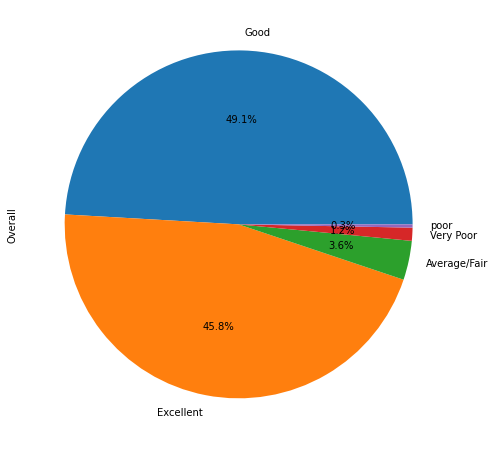

In [134]:
film.Overall.value_counts().plot(kind='pie',autopct='%.1f%%', figsize=(8,8), labels=['Good', 
                                                                                     'Excellent',
                                                                                     'Average/Fair', 
                                                                                     'Very Poor', 
                                                                                     'poor'])
plt.show()

# What factors are linked to satisfaction?

In [135]:
from sklearn.feature_selection import f_regression

In [136]:
dummy=pd.get_dummies(film.Movie, prefix='Movie', drop_first=False)

In [137]:
filmdum=pd.concat([film, dummy], axis =1)

In [138]:
filmdum.drop(columns='Movie', axis=1, inplace=True)

In [139]:
feature_columns = filmdum.columns.difference(['Overall', '_rowstate_'])
feature_columns

Index(['Age', 'Clean', 'Gender', 'Hear_About', 'Income', 'Marital_Status',
       'Movie_Ferris Buellers Day Off', 'Movie_Old School',
       'Movie_Willy Wonka', 'Parking', 'Sinage'],
      dtype='object')

In [140]:
features = filmdum[feature_columns]
target = filmdum.Overall
F_values, p_values  = f_regression( features, target )

In [141]:
fact=pd.concat( [ pd.Series(feature_columns), 
                    pd.Series(F_values).round(2), 
                        pd.Series(p_values).round(9) ], axis = 1 )

In [142]:
fact.rename(columns={0:'variables', 1:'F_value', 2:'p_value'}, inplace=True)

In [143]:
print('factors which are linked to satisfaction of customers', list(fact.loc[fact.p_value<0.05, 'variables']))

factors which are linked to satisfaction of customers ['Clean', 'Parking', 'Sinage']


### 1st factor movie

In [144]:
pd.crosstab(film.Overall, film.Movie)

Movie,Ferris Buellers Day Off,Old School,Willy Wonka
Overall,,,
1.0,59,21,71
2.0,71,10,81
3.0,4,0,8
4.0,1,0,0
5.0,2,1,1


In [145]:
stats.chi2_contingency(pd.crosstab(film.Overall, film.Movie))

(10.457715484418317,
 0.23435754152536287,
 8,
 array([[62.68787879, 14.64242424, 73.66969697],
        [67.25454545, 15.70909091, 79.03636364],
        [ 4.98181818,  1.16363636,  5.85454545],
        [ 0.41515152,  0.0969697 ,  0.48787879],
        [ 1.66060606,  0.38787879,  1.95151515]]))

####### ouput: we fail to reject null hypothesis

####### Business conclusion: with given data is unable to prove that type of movie is impacting on overall level of customer satisfaction

### 2nd factor Gender

In [146]:
stats.chi2_contingency(pd.crosstab(film.Overall, film.Gender))

(5.2040167002591415,
 0.26699728606451045,
 4,
 array([[ 45.75757576, 105.24242424],
        [ 49.09090909, 112.90909091],
        [  3.63636364,   8.36363636],
        [  0.3030303 ,   0.6969697 ],
        [  1.21212121,   2.78787879]]))

####### ouput: we fail to reject null hypothesis

####### Business conclusion: with given data is unable to prove that gender is impacting on overall level of customer satisfaction

### 3rd factor Marital_Status

In [147]:
stats.chi2_contingency(pd.crosstab(film.Overall, film.Marital_Status))

(5.2040167002591415,
 0.26699728606451045,
 4,
 array([[ 45.75757576, 105.24242424],
        [ 49.09090909, 112.90909091],
        [  3.63636364,   8.36363636],
        [  0.3030303 ,   0.6969697 ],
        [  1.21212121,   2.78787879]]))

####### ouput: we fail to reject null hypothesis

####### Business conclusion: with given data is unable to prove that Marital_Status is impacting on overall level of customer satisfaction

### 4th factor Sinage

In [148]:
stats.chi2_contingency(pd.crosstab(film.Overall, film.Sinage))

(125.61859671027882,
 4.532989700034049e-19,
 16,
 array([[5.17060606e+01, 7.22969697e+01, 2.19636364e+01, 2.74545455e+00,
         2.28787879e+00],
        [5.54727273e+01, 7.75636364e+01, 2.35636364e+01, 2.94545455e+00,
         2.45454545e+00],
        [4.10909091e+00, 5.74545455e+00, 1.74545455e+00, 2.18181818e-01,
         1.81818182e-01],
        [3.42424242e-01, 4.78787879e-01, 1.45454545e-01, 1.81818182e-02,
         1.51515152e-02],
        [1.36969697e+00, 1.91515152e+00, 5.81818182e-01, 7.27272727e-02,
         6.06060606e-02]]))

####### ouput: we reject null hypothesis

####### Business conclusion: with given data it is proved that Sinage is impacting on overall level of customer satisfaction

### 5th factor Parking

In [149]:
stats.chi2_contingency(pd.crosstab(film.Overall, film.Parking))

(230.61691663391673,
 4.783162283608565e-40,
 16,
 array([[6.17727273e+01, 7.09242424e+01, 1.32696970e+01, 3.20303030e+00,
         1.83030303e+00],
        [6.62727273e+01, 7.60909091e+01, 1.42363636e+01, 3.43636364e+00,
         1.96363636e+00],
        [4.90909091e+00, 5.63636364e+00, 1.05454545e+00, 2.54545455e-01,
         1.45454545e-01],
        [4.09090909e-01, 4.69696970e-01, 8.78787879e-02, 2.12121212e-02,
         1.21212121e-02],
        [1.63636364e+00, 1.87878788e+00, 3.51515152e-01, 8.48484848e-02,
         4.84848485e-02]]))

####### ouput: we reject null hypothesis

####### Business conclusion: with given data it is proved that Parking is impacting on overall level of customer satisfaction

### 6th factor Clean

In [150]:
stats.chi2_contingency(pd.crosstab(film.Overall, film.Clean))

(127.7194555599952,
 1.7772535915433765e-19,
 16,
 array([[6.58909091e+01, 7.09242424e+01, 1.09818182e+01, 2.28787879e+00,
         9.15151515e-01],
        [7.06909091e+01, 7.60909091e+01, 1.17818182e+01, 2.45454545e+00,
         9.81818182e-01],
        [5.23636364e+00, 5.63636364e+00, 8.72727273e-01, 1.81818182e-01,
         7.27272727e-02],
        [4.36363636e-01, 4.69696970e-01, 7.27272727e-02, 1.51515152e-02,
         6.06060606e-03],
        [1.74545455e+00, 1.87878788e+00, 2.90909091e-01, 6.06060606e-02,
         2.42424242e-02]]))

####### ouput: we reject null hypothesis

####### Business conclusion: with given data it is proved that clean is impacting on overall level of customer satisfaction

### 7th factor Age

In [151]:
stats.chi2_contingency(pd.crosstab(film.Overall, film.Age))

(10.45278328792503,
 0.5763025800406916,
 12,
 array([[1.18969697e+01, 8.09909091e+01, 5.35363636e+01, 4.57575758e+00],
        [1.27636364e+01, 8.68909091e+01, 5.74363636e+01, 4.90909091e+00],
        [9.45454545e-01, 6.43636364e+00, 4.25454545e+00, 3.63636364e-01],
        [7.87878788e-02, 5.36363636e-01, 3.54545455e-01, 3.03030303e-02],
        [3.15151515e-01, 2.14545455e+00, 1.41818182e+00, 1.21212121e-01]]))

####### ouput: we fail to reject null hypothesis

####### Business conclusion: with given data is unable to prove that Age is impacting on overall level of customer satisfaction

### 8th factor Income

In [152]:
stats.chi2_contingency(pd.crosstab(film.Overall, film.Income))

(6.1009649629951275,
 0.6359232901556379,
 8,
 array([[64.97575758, 44.84242424, 41.18181818],
        [69.70909091, 48.10909091, 44.18181818],
        [ 5.16363636,  3.56363636,  3.27272727],
        [ 0.43030303,  0.2969697 ,  0.27272727],
        [ 1.72121212,  1.18787879,  1.09090909]]))

####### ouput: we fail to reject null hypothesis

####### Business conclusion: with given data is unable to prove that Income is impacting on overall level of customer satisfaction

### 9th factor Hear_about

In [153]:
stats.chi2_contingency(pd.crosstab(film.Overall, film.Hear_About))

(17.889968762298064,
 0.33037944343128134,
 16,
 array([[1.05242424e+01, 6.40606061e+00, 7.77878788e+00, 1.92181818e+01,
         1.07072727e+02],
        [1.12909091e+01, 6.87272727e+00, 8.34545455e+00, 2.06181818e+01,
         1.14872727e+02],
        [8.36363636e-01, 5.09090909e-01, 6.18181818e-01, 1.52727273e+00,
         8.50909091e+00],
        [6.96969697e-02, 4.24242424e-02, 5.15151515e-02, 1.27272727e-01,
         7.09090909e-01],
        [2.78787879e-01, 1.69696970e-01, 2.06060606e-01, 5.09090909e-01,
         2.83636364e+00]]))

####### ouput: we fail to reject null hypothesis

####### Business conclusion: with given data is unable to prove that Hear_About is impacting on overall level of customer satisfaction

In [154]:
print('Sinage,Parking,Clean - These are the factors linked to the customer satisfaction')

Sinage,Parking,Clean - These are the factors linked to the customer satisfaction


# What is the demographic profile of Film on the Rocks patrons?

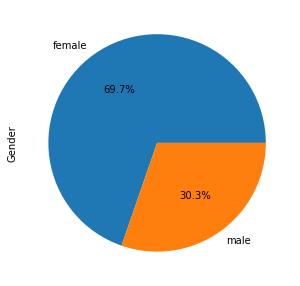

In [155]:
film.Gender.value_counts().plot(kind='pie',autopct='%.1f%%', figsize=(5,5), labels=['female', 'male'])
plt.show()

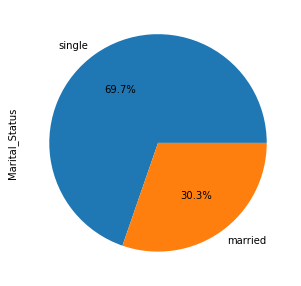

In [156]:
film.Marital_Status.value_counts().plot(kind='pie',autopct='%.1f%%', figsize=(5,5),labels=['single', 'married'])
plt.show()

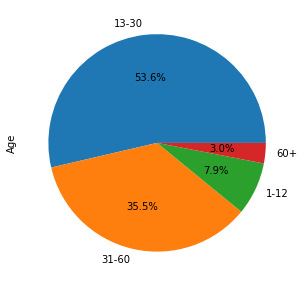

In [157]:
film.Age.value_counts().plot(kind='pie',autopct='%.1f%%', figsize=(5,5),
                            labels=['13-30', '31-60', '1-12', '60+'])
plt.show()

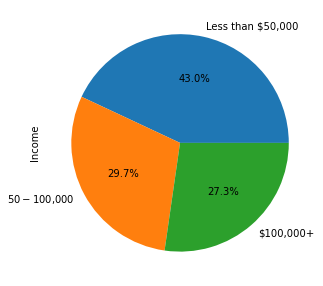

In [158]:
film.Income.value_counts().plot(kind='pie',autopct='%.1f%%', figsize=(5,5),
                               labels=['Less than $50,000','$50-$100,000', '$100,000+'])
plt.show()

### demographic profile of Film on the Rocks patrons

In [159]:
print('@ females are 64.5% where as males are 35.5%')
print('@ singles are 69.7% where as 30.3% are married')
print('@ 53.6% people are belongs 13-30 age group and 35.5% belongs to 31-60 age group')
print('@ 43% people have income less than $50,000 and 29.7% belongs to $50-$1,00,000 income group')

@ females are 64.5% where as males are 35.5%
@ singles are 69.7% where as 30.3% are married
@ 53.6% people are belongs 13-30 age group and 35.5% belongs to 31-60 age group
@ 43% people have income less than $50,000 and 29.7% belongs to $50-$1,00,000 income group


#### females are 64.5% where as males are 35.5%

In [160]:
film['m_sta']=np.where(film.Marital_Status==1, 'married', 'single')

In [161]:
pd.crosstab(film.Gender,film.Gender)

Gender,1,2
Gender,,
1,100,0
2,0,230


In [162]:
stats.chi2_contingency(pd.crosstab(film.Gender,film.Gender))

(325.2822008506616,
 1.0241237643106162e-72,
 1,
 array([[ 30.3030303,  69.6969697],
        [ 69.6969697, 160.3030303]]))

####### ouput: we reject null hypothesis

####### Business conclusion: with given data it is proved that females are higher than males

#### singles are 69.7% where as 30.3% are married

In [163]:
stats.chi2_contingency(pd.crosstab(film.Marital_Status, film.Marital_Status))

(325.2822008506616,
 1.0241237643106162e-72,
 1,
 array([[ 30.3030303,  69.6969697],
        [ 69.6969697, 160.3030303]]))

####### ouput: we reject null hypothesis

####### Business conclusion: with given data it is proved that singles are higher than married

#### 53.6% people are belongs 13-30 age group and 35.5% belongs to 31-60 age group

In [164]:
stats.chi2_contingency(pd.crosstab(film.Age, film.Age))

(990.0000000000001,
 2.4704769807051076e-207,
 9,
 array([[ 2.04848485, 13.94545455,  9.21818182,  0.78787879],
        [13.94545455, 94.93636364, 62.75454545,  5.36363636],
        [ 9.21818182, 62.75454545, 41.48181818,  3.54545455],
        [ 0.78787879,  5.36363636,  3.54545455,  0.3030303 ]]))

####### ouput: we reject null hypothesis

####### Business conclusion: with given data it is proved that '13-30' age groups people are higher than '31-60' age group

#### 43% people have income less than 50000 and 29.7 % belongs to  50 -  100000 income group

In [165]:
stats.chi2_contingency(pd.crosstab(film.Income, film.Income))

(660.0,
 1.594589741096194e-141,
 4,
 array([[61.1030303 , 42.16969697, 38.72727273],
        [42.16969697, 29.1030303 , 26.72727273],
        [38.72727273, 26.72727273, 24.54545455]]))

####### ouput: we reject null hypothesis

####### Business conclusion: with given data it is proved that people with income less than $50000 are higher

# In what media outlet(s) should the film series be advertised?

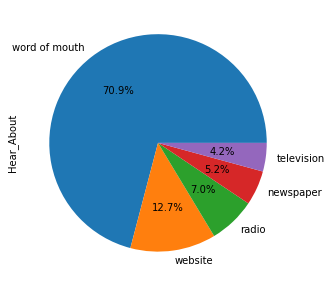

In [166]:
film.Hear_About.value_counts().plot(kind='pie',autopct='%.1f%%', figsize=(5,5),
                                   labels=['word of mouth', 
                                           'website', 'radio', 'newspaper','television'])
plt.show()

@ Almost 71% of customers said they hear about film series through word of mouth

@ almost 29% of customers said they hear about film series through website(12%), 
radio(7%), newspaper(5.2%), television(4.2%)